<a href="https://colab.research.google.com/github/Erajjamil137/Implementation-of-Stats-concepts-in-python/blob/main/implementation_of_concepts_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
file_path = '/content/drive/MyDrive/DATA SET/paralympics_2024_medal_table.csv'
df = pd.read_csv(file_path)
df.head()

,Rank,Country,Gold,Silver,Bronze,Total
0,1,China,94,76,50,220
1,2,Great Britain,49,44,31,124
2,3,United States,36,42,27,105
3,4,Netherlands,27,17,12,56
4,–,Neutral Paralympic Athletes,26,22,23,71


In [ ]:
column = 'Gold'

data_range = df[column].max() - df[column].min()

# Determine the number of classes
num_classes = int(1 + 3.322 * np.log10(len(df[column])))

# Calculate class width
class_width = np.ceil(data_range / num_classes)

# Generate the bin intervals
bins = np.arange(df[column].min(), df[column].max() + class_width, class_width)

# Create class intervals
class_intervals = pd.cut(df[column], bins=bins, right=False, include_lowest=True)

# Calculate the frequency for each class interval
frequency = class_intervals.value_counts().sort_index()

# Calculate the cumulative frequency
cumulative_frequency = frequency.cumsum()

# Calculate the relative frequency
relative_frequency = frequency / len(df[column])

# Create class boundaries
class_boundaries = [(interval.left, interval.right) for interval in frequency.index]

# Putting everything together
summary = pd.DataFrame({
    "Class Boundaries": class_boundaries,
    "Frequency": frequency.values,
    "Cumulative Frequency": cumulative_frequency.values,
    "Relative Frequency": relative_frequency.values
})

# Display the summary
print(summary)

# Display the range of the data
print(f"Range: {data_range}")

  Class Boundaries  Frequency  Cumulative Frequency  Relative Frequency
0      (0.0, 14.0)         58                    58            0.840580
1     (14.0, 28.0)          8                    66            0.115942
2     (28.0, 42.0)          1                    67            0.014493
3     (42.0, 56.0)          1                    68            0.014493
4     (56.0, 70.0)          0                    68            0.000000
5     (70.0, 84.0)          0                    68            0.000000
6     (84.0, 98.0)          1                    69            0.014493
Range: 94


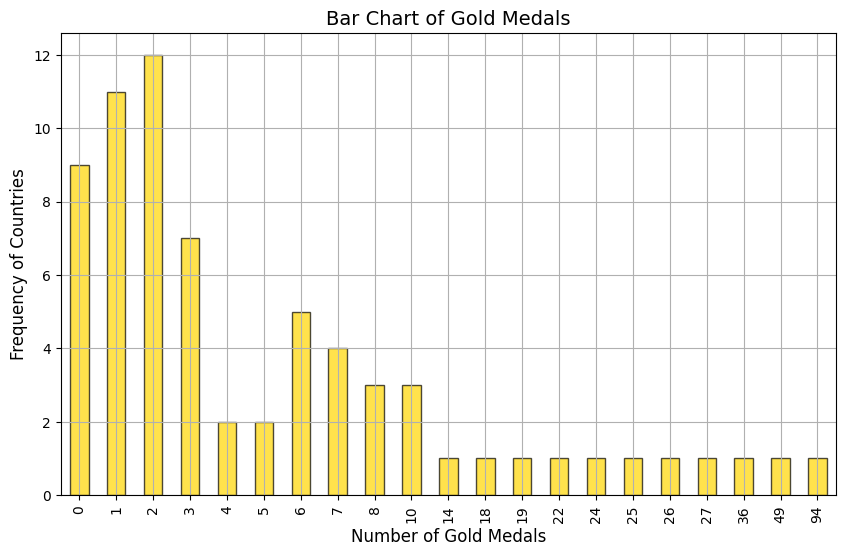

In [ ]:
gold_medals = df[column]

gold_counts = gold_medals.value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
gold_counts.plot(kind='bar', color='gold', edgecolor='black', alpha=0.7)

plt.title("Bar Chart of Gold Medals", fontsize=14)
plt.xlabel("Number of Gold Medals", fontsize=12)
plt.ylabel("Frequency of Countries", fontsize=12)

# Show the plot
plt.grid(True)
plt.show()

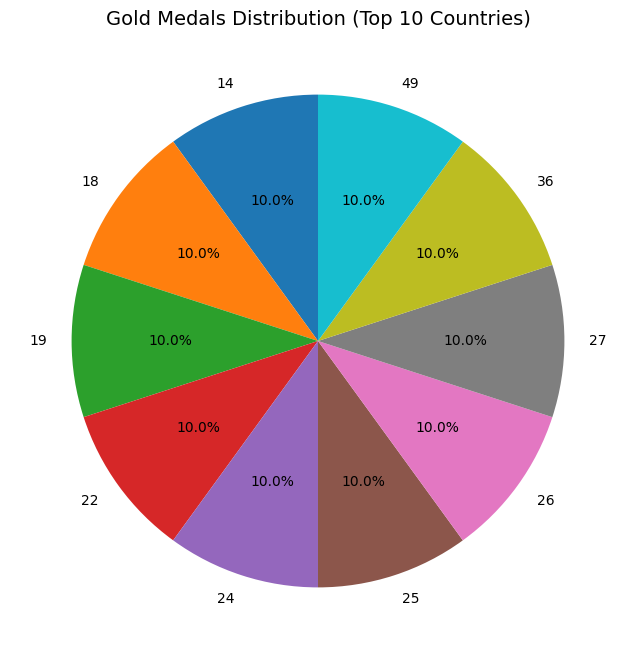

In [ ]:
gold_counts_top10 = gold_counts.nsmallest(10)

# Plotting the bar chart
plt.figure(figsize=(8, 8))  # Set figure size
plt.pie(gold_counts_top10, labels=gold_counts_top10.index, autopct='%1.1f%%', startangle=90)
plt.title('Gold Medals Distribution (Top 10 Countries)', fontsize=14)

# Display the plot
plt.show()

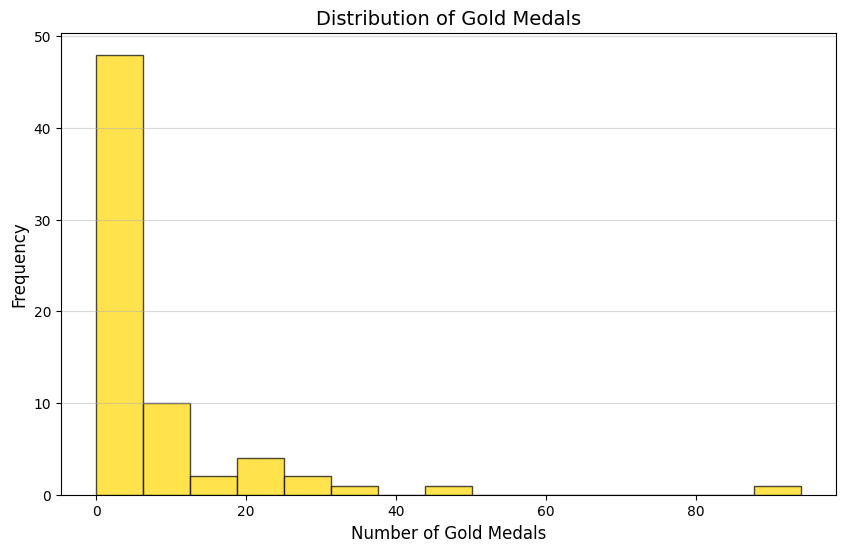

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(df[column], bins=15, edgecolor='black', color='gold', alpha=0.7)

plt.title('Distribution of Gold Medals', fontsize=14)
plt.xlabel('Number of Gold Medals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.5)

plt.show()

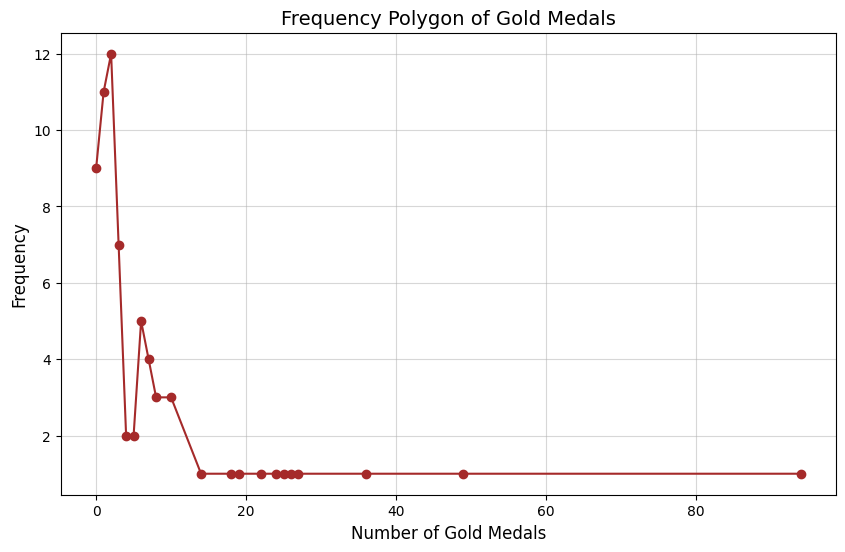

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(gold_counts.index, gold_counts.values, marker='o', linestyle='-', color='brown')

plt.title('Frequency Polygon of Gold Medals', fontsize=14)
plt.xlabel('Number of Gold Medals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.5)

plt.show()

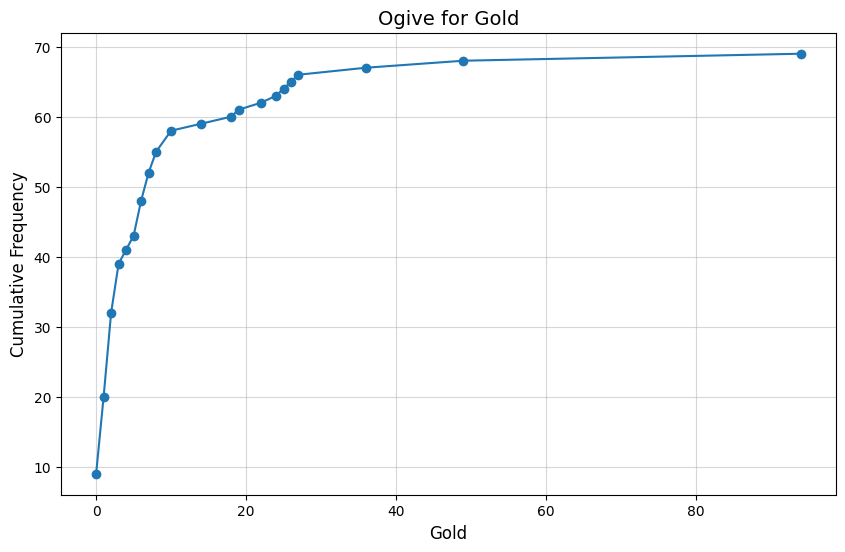

In [ ]:

def create_ogive(data, column_name):
  frequency = data[column_name].value_counts().sort_index()

  # Calculate cumulative frequency
  cumulative_frequency = frequency.cumsum()

  # Create the Ogive plot
  plt.figure(figsize=(10, 6))
  plt.plot(cumulative_frequency.index, cumulative_frequency.values, marker='o', linestyle='-')
  plt.title(f'Ogive for {column_name}', fontsize=14)
  plt.xlabel(column_name, fontsize=12)
  plt.ylabel('Cumulative Frequency', fontsize=12)
  plt.grid(alpha=0.5)
  plt.show()

create_ogive(df, column)

In [ ]:
import numpy as np

def arithmetic_mean(data):
  return np.mean(data)

def geometric_mean(data):
  return np.exp(np.mean(np.log(data)))

def harmonic_mean(data):
   return len(data) / np.sum(1.0 / np.array(data))


print(f"Arithmetic mean: {arithmetic_mean(df[column])}")
print(f"Geometric mean: {geometric_mean(df[column])}")
print(f"Harmonic mean: {harmonic_mean(df[column])}")

Arithmetic mean: 7.826086956521739
Geometric mean: 0.0
Harmonic mean: 0.0


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-25-ba3a97b8b3f3>:10: RuntimeWarning: divide by zero encountered in divide
  return len(data) / np.sum(1.0 / np.array(data))


In [ ]:

# Calculate skewness
skewness = df[column].skew()

# Print the skewness value
print(f"Skewness of Gold column: {skewness}")

# Interpretation:
if skewness > 0:
    print("The distribution is positively skewed (right-skewed).")
elif skewness < 0:
    print("The distribution is negatively skewed (left-skewed).")
else:
    print("The distribution is approximately symmetrical.")

Skewness of Gold column: 4.122849998364218
The distribution is positively skewed (right-skewed).


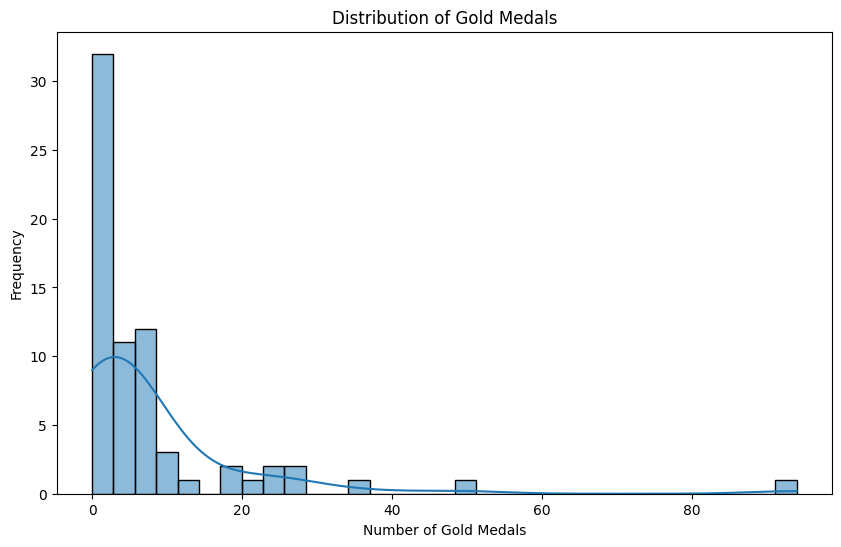

In [ ]:

import seaborn as sns


# histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[column], kde=True)
plt.title("Distribution of Gold Medals")
plt.xlabel("Number of Gold Medals")
plt.ylabel("Frequency")
plt.show()

In [ ]:

# Calculating quartiles
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)

# Printing the quartile values
print(f"Lower Quartile (Q1): {Q1}")
print(f"Upper Quartile (Q3): {Q3}")

Lower Quartile (Q1): 1.0
Upper Quartile (Q3): 7.0


In [ ]:

# Calculating data range and class width
data_range = df[column].max() - df[column].min()
num_classes = int(1 + 3.322 * np.log10(len(df[column])))  # Sturges' rule
class_width = np.ceil(data_range / num_classes)

# Creating class boundaries
lower_bounds = np.arange(df[column].min(), df[column].max() + class_width, class_width)
upper_bounds = lower_bounds[1:]
class_boundaries = list(zip(lower_bounds[:-1], upper_bounds))

# Creating class labels
class_labels = [f"{int(lower)}-{int(upper)}" for lower, upper in class_boundaries]

# Assign class boundaries to data points
df['Class Boundaries'] = pd.cut(df[column], bins=lower_bounds, labels=class_labels, include_lowest=True)

# Calculating deciles
deciles = df[column].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

# Print the decile values
print("Deciles:")
for i, decile in enumerate(deciles):
    print(f"D{i+1}: {decile}")

print(df[['Gold', 'Class Boundaries']].head())

Deciles:
D1: 0.0
D2: 1.0
D3: 2.0
D4: 2.0
D5: 3.0
D6: 4.799999999999997
D7: 6.599999999999994
D8: 8.800000000000011
D9: 22.400000000000006
   Gold Class Boundaries
0    94            84-98
1    49            42-56
2    36            28-42
3    27            14-28
4    26            14-28


In [ ]:

#Calculate Class Boundaries

# Calculating data range and class width
data_range = df[column].max() - df[column].min()
num_classes = int(1 + 3.322 * np.log10(len(df[column])))  # Sturges' rule
class_width = np.ceil(data_range / num_classes)

# Creating class boundaries
lower_bounds = np.arange(df[column].min(), df[column].max() + class_width, class_width)
upper_bounds = lower_bounds[1:]
class_boundaries = list(zip(lower_bounds[:-1], upper_bounds))

# Create class labels
class_labels = [f"{int(lower)}-{int(upper)}" for lower, upper in class_boundaries]

# Assign class boundaries to data points
df['Class Boundaries'] = pd.cut(df[column], bins=lower_bounds, labels=class_labels, include_lowest=True)

# Calculating percentiles
percentiles = df[column].quantile([0.25, 0.50, 0.75])

# Printing the percentile values
print("Percentiles:")
print(f"25th Percentile (Q1): {percentiles[0.25]}")
print(f"50th Percentile (Median): {percentiles[0.50]}")
print(f"75th Percentile (Q3): {percentiles[0.75]}")

# Display
print(df[['Gold', 'Class Boundaries']].head())

Percentiles:
25th Percentile (Q1): 1.0
50th Percentile (Median): 3.0
75th Percentile (Q3): 7.0
   Gold Class Boundaries
0    94            84-98
1    49            42-56
2    36            28-42
3    27            14-28
4    26            14-28


In [ ]:

# Calculating the average of 'Gold'
average_gold = df[column].mean()

# Printing the average
print(f"Average Gold Medals: {average_gold}")

Average Gold Medals: 7.826086956521739


Measures of Dispersion:
Gold - Range: 94, Variance: 196.32225063938617, Standard Deviation: 14.011504224721419
Silver - Range: 76, Variance: 152.8222506393862, Standard Deviation: 12.36212969675477
Bronze - Range: 50, Variance: 117.21994884910485, Standard Deviation: 10.826816191711433


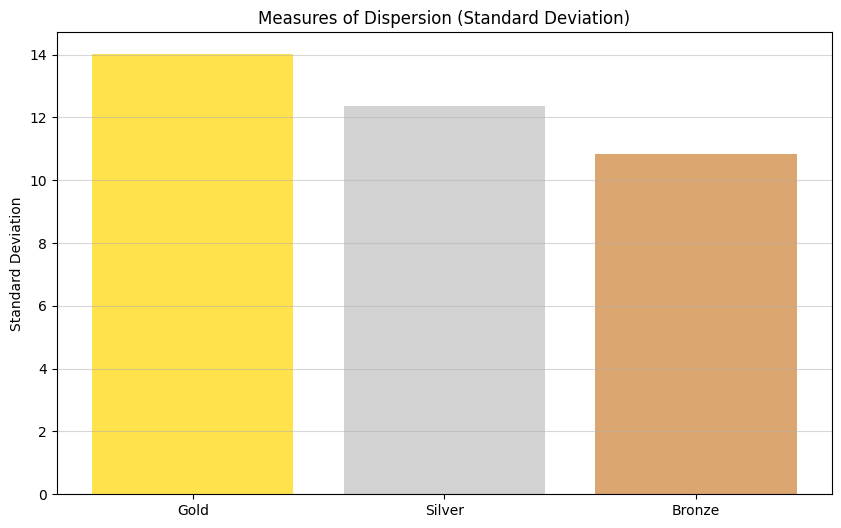

In [ ]:

# Calculating measures of dispersion
def calculate_dispersion(data, column_name):
    data_range = data[column_name].max() - data[column_name].min()
    variance = data[column_name].var()
    std_deviation = data[column_name].std()
    return data_range, variance, std_deviation

gold_range, gold_var, gold_std = calculate_dispersion(df, column)
silver_range, silver_var, silver_std = calculate_dispersion(df, 'Silver')
bronze_range, bronze_var, bronze_std = calculate_dispersion(df, 'Bronze')

# Printing the results
print("Measures of Dispersion:")
print(f"Gold - Range: {gold_range}, Variance: {gold_var}, Standard Deviation: {gold_std}")
print(f"Silver - Range: {silver_range}, Variance: {silver_var}, Standard Deviation: {silver_std}")
print(f"Bronze - Range: {bronze_range}, Variance: {bronze_var}, Standard Deviation: {bronze_std}")

# Ploting the results
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(['Gold', 'Silver', 'Bronze'], [gold_std, silver_std, bronze_std], color=['gold', 'silver', '#cd7f32'], alpha=0.7)  # Using standard deviation for the bar chart
ax.set_title("Measures of Dispersion (Standard Deviation)")
ax.set_ylabel("Standard Deviation")
ax.grid(axis='y', alpha=0.5)
plt.show()

In [ ]:

# Calculating coefficient of quartile deviation
def calculate_cqd(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    cqd = (Q3 - Q1) / (Q3 + Q1)
    return cqd

gold_cqd = calculate_cqd(df, 'Gold')
silver_cqd = calculate_cqd(df, 'Silver')
bronze_cqd = calculate_cqd(df, 'Bronze')

# Printing the results
print("Coefficient of Quartile Deviation:")
print(f"Gold: {gold_cqd}")
print(f"Silver: {silver_cqd}")
print(f"Bronze: {bronze_cqd}")

Coefficient of Quartile Deviation:
Gold: 0.75
Silver: 0.8
Bronze: 0.7142857142857143


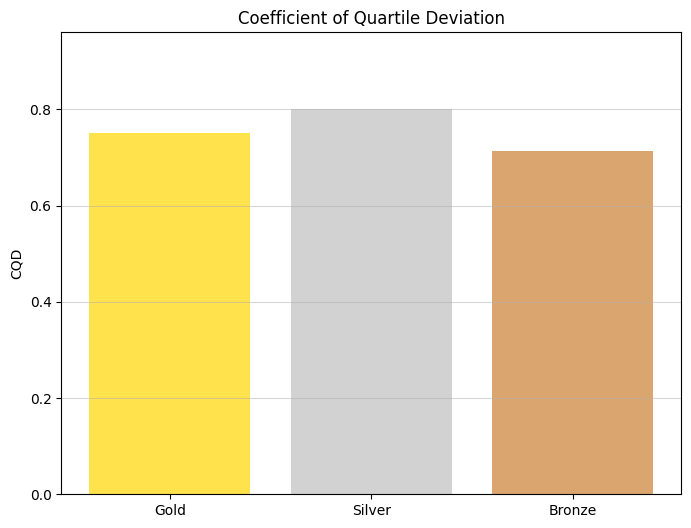

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(['Gold', 'Silver', 'Bronze'], [gold_cqd, silver_cqd, bronze_cqd], color=['gold', 'silver', '#cd7f32'], alpha=0.7)
plt.title("Coefficient of Quartile Deviation")
plt.ylabel("CQD")
plt.ylim(0, max(gold_cqd, silver_cqd, bronze_cqd) * 1.2)
plt.grid(axis='y', alpha=0.5)
plt.show()

In [ ]:

# Calculating mean deviation
def calculate_mean_deviation(data, column_name):
    mean = data[column_name].mean()
    mean_deviation = np.mean(np.abs(data[column_name] - mean))
    return mean_deviation

gold_md = calculate_mean_deviation(df, 'Gold')
silver_md = calculate_mean_deviation(df, 'Silver')
bronze_md = calculate_mean_deviation(df, 'Bronze')

# Printing the results
print("Mean Deviation:")
print(f"Gold: {gold_md}")
print(f"Silver: {silver_md}")
print(f"Bronze: {bronze_md}")

Mean Deviation:
Gold: 7.96975425330813
Silver: 7.589161940768746
Bronze: 8.078134845620669


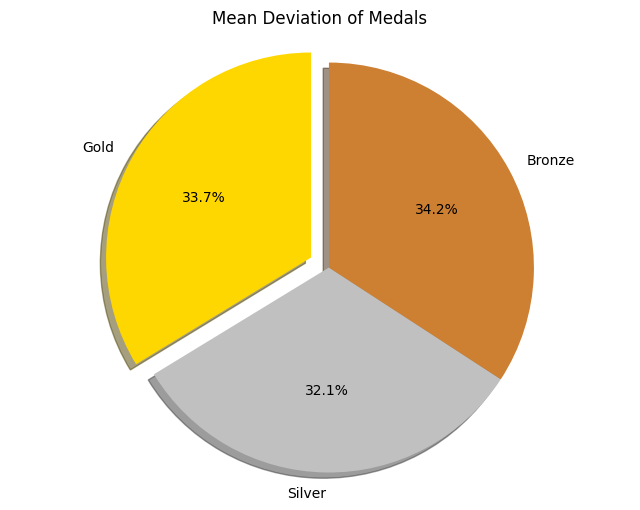

In [ ]:
labels = ['Gold', 'Silver', 'Bronze']
sizes = [gold_md, silver_md, bronze_md]
colors = ['gold', 'silver', '#cd7f32']
explode = (0.1, 0, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Mean Deviation of Medals")
plt.axis('equal')
plt.show()

In [ ]:

# Calculating coefficient of dispersion for mean deviation
def calculate_coefficient_of_dispersion(data, column_name):
    mean = data[column_name].mean()
    mean_deviation = np.mean(np.abs(data[column_name] - mean))
    coefficient_of_dispersion = mean_deviation / mean
    return coefficient_of_dispersion

gold_cod = calculate_coefficient_of_dispersion(df, 'Gold')
silver_cod = calculate_coefficient_of_dispersion(df, 'Silver')
bronze_cod = calculate_coefficient_of_dispersion(df, 'Bronze')

# Printing the results
print("Coefficient of Dispersion (Mean Deviation):")
print(f"Gold: {gold_cod}")
print(f"Silver: {silver_cod}")
print(f"Bronze: {bronze_cod}")

Coefficient of Dispersion (Mean Deviation):
Gold: 1.0183574879227055
Silver: 0.9697262479871176
Bronze: 0.9431324946663725
